In [20]:
# 1. check distribution
print(df['category'].value_counts())

category
Account Issue      2
Billing Issue      2
Technical Issue    2
Network Issue      1
Name: count, dtype: int64


In [43]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle


In [21]:
# 2. try bigram TF-IDF + logistic regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("D:/AI_Ticket_Classifier/AI_Ticket_Classifier/data/cleaned_tickets.csv")
print(df.head())

                                    text         category  \
0            I can't login to my account    Account Issue   
1    My internet connection is very slow    Network Issue   
2       Please help me reset my password    Account Issue   
3      I was overcharged on my last bill    Billing Issue   
4  The app keeps crashing when I open it  Technical Issue   

                   clean_text  
0          cant login account  
1    internet connection slow  
2  please help reset password  
3       overcharged last bill  
4     app keeps crashing open  


In [3]:
X = df['clean_text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 5
Testing samples: 2


In [4]:
vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)

TF-IDF shape: (5, 18)


In [29]:
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

Account Issue       0.00      0.00      0.00       1.0
Billing Issue       0.00      0.00      0.00       0.0
Network Issue       0.00      0.00      0.00       1.0

     accuracy                           0.00       2.0
    macro avg       0.00      0.00      0.00       2.0
 weighted avg       0.00      0.00      0.00       2.0



D:\AI_Ticket_Classifier\AI_Ticket_Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\AI_Ticket_Classifier\AI_Ticket_Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\AI_Ticket_Classifier\AI_Ticket_Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [30]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [31]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.0

Classification Report:
                precision    recall  f1-score   support

Account Issue       0.00      0.00      0.00       1.0
Billing Issue       0.00      0.00      0.00       0.0
Network Issue       0.00      0.00      0.00       1.0

     accuracy                           0.00       2.0
    macro avg       0.00      0.00      0.00       2.0
 weighted avg       0.00      0.00      0.00       2.0



D:\AI_Ticket_Classifier\AI_Ticket_Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\AI_Ticket_Classifier\AI_Ticket_Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\AI_Ticket_Classifier\AI_Ticket_Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [32]:
sample = ["My payment failed but money was deducted"]
sample_tfidf = vectorizer.transform(sample)
print("Predicted Category:", model.predict(sample_tfidf)[0])

Predicted Category: Billing Issue


In [33]:
sample = ["Please help me reset my password"]
sample_tfidf = vectorizer.transform(sample)
print("Predicted Category:", model.predict(sample_tfidf)[0])

Predicted Category: Account Issue


In [34]:
sample = ["My internet connection is very slow"]
sample_tfidf = vectorizer.transform(sample)
print("Predicted Category:", model.predict(sample_tfidf)[0])

Predicted Category: Billing Issue


In [13]:
df['category'].value_counts()

category
Account Issue      2
Billing Issue      2
Technical Issue    2
Network Issue      1
Name: count, dtype: int64

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print("Classes:", model.classes_)
print(cm)

               precision    recall  f1-score   support

Account Issue       0.00      0.00      0.00       1.0
Billing Issue       0.00      0.00      0.00       0.0
Network Issue       0.00      0.00      0.00       1.0

     accuracy                           0.00       2.0
    macro avg       0.00      0.00      0.00       2.0
 weighted avg       0.00      0.00      0.00       2.0

Classes: ['Account Issue' 'Billing Issue' 'Technical Issue']
[[0 1 0]
 [0 0 0]
 [0 0 0]]


D:\AI_Ticket_Classifier\AI_Ticket_Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\AI_Ticket_Classifier\AI_Ticket_Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\AI_Ticket_Classifier\AI_Ticket_Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [16]:
import numpy as np
# model = MultinomialNB(), vectorizer = fitted TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()
for i, cls in enumerate(model.classes_):
    topn = np.argsort(model.feature_log_prob_[i])[-20:]
    print(f"\nTop features for {cls}:")
    print([feature_names[j] for j in topn])


Top features for Account Issue:
['amount', 'app', 'bill', 'crashing', 'deducted', 'failed', 'keeps', 'last', 'payment', 'messages', 'open', 'overcharged', 'unable', 'send', 'help', 'password', 'reset', 'please']

Top features for Billing Issue:
['app', 'crashing', 'help', 'keeps', 'password', 'please', 'open', 'messages', 'reset', 'send', 'unable', 'deducted', 'payment', 'failed', 'amount', 'bill', 'last', 'overcharged']

Top features for Technical Issue:
['amount', 'bill', 'failed', 'deducted', 'help', 'payment', 'overcharged', 'last', 'please', 'reset', 'password', 'crashing', 'open', 'keeps', 'messages', 'send', 'unable', 'app']


In [35]:
def rule_based_category(text):
    text_l = text.lower()
    network_keywords = ['internet','connection','wifi','network','slow','lag','latency','disconnect']
    for k in network_keywords:
        if k in text_l:
            return 'Network Issue'
    return None

def predict_with_fallback(text):
    rule = rule_based_category(text)
    if rule:
        return rule
    # else use ML
    vect = vectorizer.transform([text])
    return model.predict(vect)[0]

print(predict_with_fallback("My internet connection is very slow"))


Network Issue


In [36]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)
model.fit(X_train_tfidf, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [38]:
sample = ["My internet connection is very slow"]
sample_tfidf = vectorizer.transform(sample)
print("Predicted Category:", model.predict(sample_tfidf)[0])

Predicted Category: Billing Issue


In [41]:
import os
import pickle

# ✅ Step 1: Ensure the folder exists
os.makedirs("model", exist_ok=True)

# ✅ Step 2: Save the model and vectorizer
with open("model/ticket_classifier.pkl", "wb") as f:
    pickle.dump(model, f)

with open("model/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ Model and vectorizer saved successfully in the 'model' folder.")


✅ Model and vectorizer saved successfully in the 'model' folder.


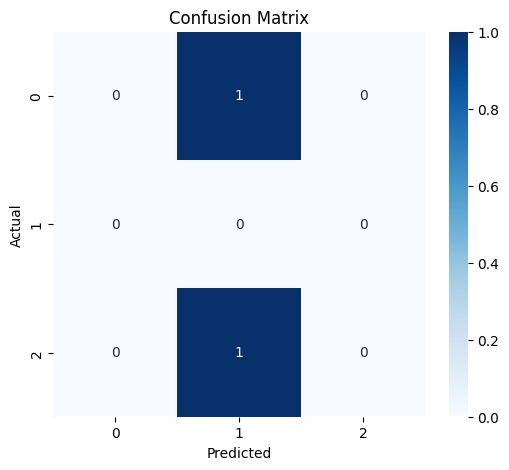

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()